# Matplotlib Masterclass — All Major Plot Types, Properties, Usage & Code (Single File)
*Auto-generated on 2025-08-21 10:51:03*


> **How to use this notebook**  
> - Run cells from top to bottom.  
> - Every chart is generated in its own figure (no subplots).  
> - No specific colors or external styles are set.  
> - Examples use small, synthetic datasets so everything runs locally.  
> - Requires only: `matplotlib`, `numpy`, and `pandas` (optional for a few examples).




## 1) Setup & Imports

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

# Render inline in notebooks (no external style, no seaborn)
%matplotlib inline



## 2) Quick Primer: Figure, Axes, and Artist
- **Figure**: the entire window/page.
- **Axes**: the area where data is plotted (with x/y axis).
- **Artist**: everything on the figure is an Artist (lines, text, ticks, etc.).

**Common properties you’ll see in examples:**
- `plt.figure(figsize=(w, h), dpi=...)` — control figure size and resolution.
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()` — text labels.
- `plt.xlim()`, `plt.ylim()` — axis ranges.
- `plt.grid(True)` — gridlines.
- `plt.legend()` — legend for labeled artists.
- `plt.tight_layout()` — better spacing.
- `plt.savefig("file.png")` — export.


## 3) Sample Data Used Across Examples

In [3]:
# ----------------------------------------------------------------------------------------
# WHY WE USE THESE DATASETS
# ----------------------------------------------------------------------------------------
# These synthetic datasets are created to demonstrate different types of charts such as
# line plots, bar charts, area charts, density plots, contour maps, and heatmaps.
#
# ADVANTAGES OF USING THESE SYNTHETIC DEMO DATASETS:
# 1. Consistency: Students get the same values every time, ensuring uniform learning.
# 2. Clarity: Simple and controlled data makes it easier to understand chart behaviour.
# 3. Versatility: Allows demonstration of almost every chart type used in analytics.
# 4. No dependency: No need to import external datasets; everything runs locally.
# 5. Fast Processing: Small arrays improve plotting speed and reduce memory load.
# ----------------------------------------------------------------------------------------


# Small synthetic datasets for consistent demonstrations
x = np.linspace(0, 10, 50)               # Generates 50 points between 0 and 10 for line plots
y = np.sin(x)                            # Sine function values for smooth line plotting
y2 = np.cos(x)                           # Cosine function values for comparison lines

# Categorical data
categories = ['A', 'B', 'C', 'D', 'E']   # Category labels for bar/pie charts
values = np.array([23, 45, 12, 36, 29])  # Numerical values for each category

# Grouped data (for stacked / area / multi-line chart examples)
months = np.arange(1, 13)                # Months 1–12 for time-series plots
sales_A = np.random.randint(20, 50, size=12)   # Random integers 20–49 for Product A sales
sales_B = np.random.randint(10, 40, size=12)   # Random integers 10–39 for Product B sales
sales_C = np.random.randint(5, 35, size=12)    # Random integers 5–34 for Product C sales

# 2D data for density, contour, and heatmap examples
x2 = np.random.randn(1000)               # 1000 normally distributed values for x-axis density
y2d = 0.5 * x2 + np.random.randn(1000)   # Generates correlated data (useful for scatter density)

# 2D grid for contour or surface-like plots
X = np.linspace(-3, 3, 100)              # 100 points from -3 to 3 for grid (x-axis)
Y = np.linspace(-3, 3, 100)              # 100 points from -3 to 3 for grid (y-axis)
XX, YY = np.meshgrid(X, Y)               # Creates 2D coordinate grid matrices
ZZ = np.sin(XX**2 + YY**2) / (1 + XX**2 + YY**2)   # Function to create wave-like surface intensity

# Convert structured sales data into a DataFrame
df = pd.DataFrame({
    'month': months,                     # Month number column
    'sales_A': sales_A,                  # Sales values for Product A
    'sales_B': sales_B,                  # Sales values for Product B
    'sales_C': sales_C                   # Sales values for Product C
})

df.head()                                # Displays the first 5 rows of the DataFrame


,month,sales_A,sales_B,sales_C
0,1,26,20,16
1,2,39,20,34
2,3,48,33,10
3,4,34,30,6
4,5,30,13,32


## 4) Line Plot (`plt.plot`)


**Use-cases:** trends over continuous x, time series, function plots  
**Key properties:** `linestyle`, `linewidth`, `marker`, `label` (we avoid explicit colors)

**Tips:** Add grid, titles, axis labels, and legends as needed.


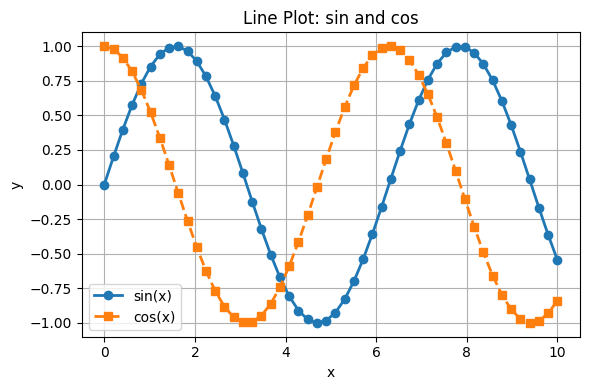

In [26]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A LINE PLOT
# ----------------------------------------------------------------------------------------
# A line plot is used to visualize trends, continuous changes, and relationships
# between variables over a range. It is ideal for mathematical functions, time-series
# data, and comparative analysis between two or more continuous datasets.
#
# ADVANTAGES OF LINE PLOTS:
# 1. Shows trends clearly (increasing, decreasing, periodic patterns).
# 2. Excellent for comparing multiple lines in one figure.
# 3. Easy to read and interpret for both technical and non-technical users.
# 4. Effective for demonstrating function behaviour (e.g., sine and cosine).
# 5. Supports markers, colors, and line styles for enhanced clarity.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                         # Creates a new figure window of size 6x4 inches

plt.plot(x, y, linestyle='-', linewidth=2, marker='o',            # Plots sin(x) line with solid style, thick line, and circular markers
         label='sin(x)')                                          # Adds label for legend identification

plt.plot(x, np.cos(x), linestyle='--', linewidth=2, marker='s',   # Plots cos(x) with dashed style and square markers
         label='cos(x)')                                          # Adds label for legend identification

plt.title('Line Plot: sin and cos')                              # Title displayed at the top of the plot
plt.xlabel('x')                                                   # X-axis label
plt.ylabel('y')                                                   # Y-axis label

plt.grid(True)                                                    # Enables background grid for readability
plt.legend()                                                      # Displays legend for identifying plotted lines

plt.tight_layout()                                                # Optimizes spacing to prevent label overlap
plt.show()                                                        # Renders the plot on screen


## 5) Scatter Plot (`plt.scatter`)


**Use-cases:** relationship between two continuous variables, clustering, correlations  
**Key properties:** `s` (size), `alpha` (transparency), `marker`, `label`

**Note:** Avoid overplotting by adjusting `alpha`.


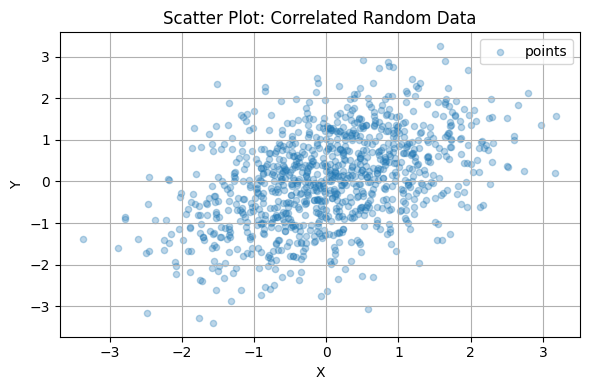

In [5]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A SCATTER PLOT
# ----------------------------------------------------------------------------------------
# A scatter plot is used to visualize the relationship between two continuous variables.
# It is ideal for identifying correlation, clustering patterns, outliers, or the spread
# of data. Scatter plots are widely used in data analytics, statistics, ML, and research.
#
# ADVANTAGES OF SCATTER PLOTS:
# 1. Clearly shows the relationship (positive, negative, or no correlation).
# 2. Reveals data clustering, patterns, and anomalies.
# 3. Useful for large datasets and noise analysis.
# 4. Helps in regression, trendline fitting, and predictive modeling.
# 5. Simple and visually intuitive representation of 2D data.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                   # Creates a new figure window with 6x4 inch dimensions

plt.scatter(x2, y2d, s=20, alpha=0.3, label='points')        # Scatter plot of x2 vs y2d, with point size=20 and 30% transparency

plt.title('Scatter Plot: Correlated Random Data')            # Adds a title describing the scatter plot
plt.xlabel('X')                                              # Label for X-axis
plt.ylabel('Y')                                              # Label for Y-axis

plt.grid(True)                                               # Enables grid lines for better visual mapping
plt.legend()                                                 # Displays a legend for the plotted points

plt.tight_layout()                                           # Adjusts layout to avoid element overlap
plt.show()                                                   # Displays the final scatter plot on screen


## 6) Bar Plot (`plt.bar`)


**Use-cases:** categorical comparisons, rankings  
**Key properties:** `width`, `align`, `label`

**Variations:** horizontal bars (`plt.barh`), stacked bars (by summing bottoms).


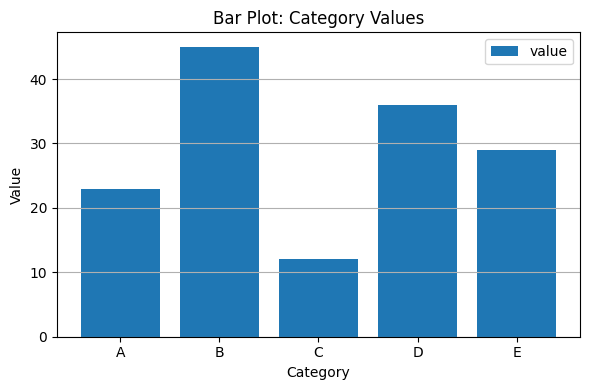

In [6]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A BAR CHART
# ----------------------------------------------------------------------------------------
# A bar chart is used to compare values across discrete categories. It is ideal for
# categorical data, performance comparison, rankings, and business analytics.
#
# ADVANTAGES OF BAR CHARTS:
# 1. Easy comparison of different categories.
# 2. Clear visualization of differences in magnitude.
# 3. Supports both vertical and horizontal formats.
# 4. Works well for small- and medium-sized categorical datasets.
# 5. Flexible with labels, grouping, and stacked variations.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                   # Creates a figure sized 6x4 inches

plt.bar(categories, values, label='value')                  # Draws a bar chart: categories on x-axis, values as bar heights

plt.title('Bar Plot: Category Values')                      # Adds title describing the chart
plt.xlabel('Category')                                      # Label for X-axis
plt.ylabel('Value')                                         # Label for Y-axis

plt.grid(True, axis='y')                                    # Adds horizontal grid lines only for readability
plt.legend()                                                # Displays legend for the bars

plt.tight_layout()                                          # Optimizes spacing to prevent overlap
plt.show()                                                  # Renders the bar chart on screen


## 7) Horizontal Bar Plot (`plt.barh`)

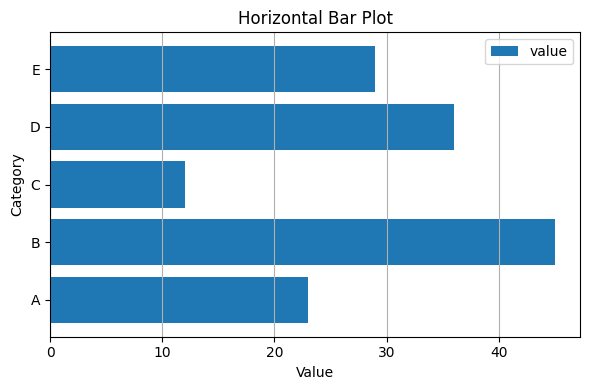

In [7]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A HORIZONTAL BAR CHART
# ----------------------------------------------------------------------------------------
# A horizontal bar chart is ideal when category names are long or when you want to
# emphasize comparison across items with clear readability. It is commonly used in
# business dashboards, ranking reports, and categorical performance analysis.
#
# ADVANTAGES OF HORIZONTAL BAR CHARTS:
# 1. Better readability when category labels are long or text-heavy.
# 2. Makes comparison easier, especially when values differ widely.
# 3. Improves visual clarity when many categories are present.
# 4. Ideal for ranking, sorted data, and categorical analysis.
# 5. Works well for dashboards and presentations due to clean layout.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                   # Creates the plotting canvas with 6x4 inch dimensions

plt.barh(categories, values, label='value')                 # Draws horizontal bars: categories on y-axis, values on x-axis

plt.title('Horizontal Bar Plot')                            # Title describing the chart
plt.xlabel('Value')                                         # Label for the horizontal axis
plt.ylabel('Category')                                      # Label for the vertical axis (categories)

plt.grid(True, axis='x')                                    # Adds vertical grid lines for readability on x-axis
plt.legend()                                                # Shows the legend for the bar series

plt.tight_layout()                                          # Adjusts spacing to prevent cutoff of labels
plt.show()                                                   # Displays the horizontal bar chart


## 8) Histogram (`plt.hist`)


**Use-cases:** distribution of a single variable  
**Key properties:** `bins`, `range`, `density`, `alpha`

**Tip:** Compare multiple distributions by plotting multiple histograms with some transparency.


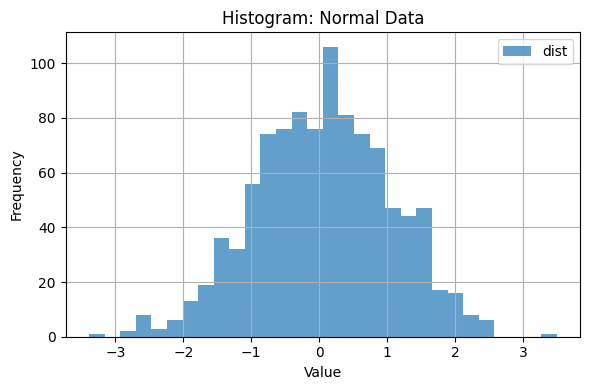

In [8]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A HISTOGRAM
# ----------------------------------------------------------------------------------------
# A histogram is used to visualize the distribution of continuous numerical data.
# It helps analysts understand how values are spread—whether the data is normal,
# skewed, uniform, multi-modal, or contains outliers.
#
# ADVANTAGES OF HISTOGRAMS:
# 1. Shows the shape of the data distribution clearly.
# 2. Helps identify skewness, peaks, and spread.
# 3. Useful for detecting outliers and abnormal patterns.
# 4. Supports statistical analysis and probability modeling.
# 5. Essential for quality control, machine learning preprocessing,
#    and exploratory data analysis (EDA).
# ----------------------------------------------------------------------------------------


data = np.random.randn(1000)                           # Generates 1000 random values from standard normal distribution

plt.figure(figsize=(6,4))                              # Creates a figure of size 6x4 inches

plt.hist(data, bins=30, alpha=0.7, label='dist')       # Plots histogram with 30 bins and 70% opacity for visual clarity

plt.title('Histogram: Normal Data')                    # Adds a title describing the plot
plt.xlabel('Value')                                    # Label for X-axis (value range)
plt.ylabel('Frequency')                                # Label for Y-axis (count per bin)

plt.grid(True)                                         # Turns on grid lines for easier reading
plt.legend()                                           # Displays legend for the histogram series

plt.tight_layout()                                     # Ensures labels and plot elements fit neatly
plt.show()                                             # Renders the histogram on screen


## 9) Box Plot (`plt.boxplot`)


**Use-cases:** distribution summary (median, quartiles, outliers) across groups  
**Key properties:** `vert`, `labels`, `showmeans`


C:\Users\pc\AppData\Local\Temp\ipykernel_11284\339220790.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3],                    # Plots 3 groups side-by-side


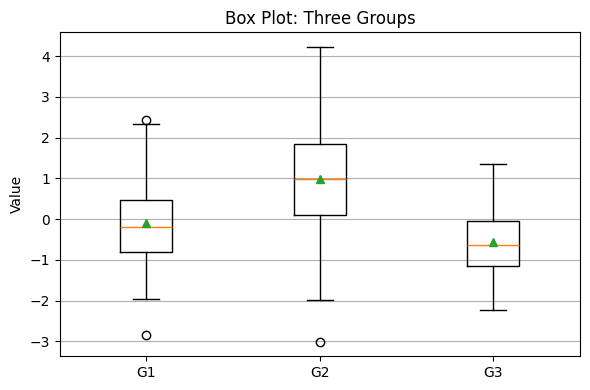

In [9]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A BOX PLOT
# ----------------------------------------------------------------------------------------
# A box plot (box-and-whisker plot) is used to summarize the distribution of a dataset
# using five key statistics: minimum, Q1, median, Q3, and maximum.
# It is ideal for comparing multiple groups side-by-side.
#
# ADVANTAGES OF BOX PLOTS:
# 1. Shows spread, central tendency, and variability clearly.
# 2. Helps detect outliers and extreme values quickly.
# 3. Efficient for comparing multiple groups in a single chart.
# 4. Highlights symmetry vs. skewness of the distribution.
# 5. Useful in quality control, statistical benchmarking, and EDA.
# ----------------------------------------------------------------------------------------


group1 = np.random.normal(0, 1, 200)                     # Generates 200 values (mean=0, std=1) for Group 1
group2 = np.random.normal(1, 1.2, 200)                   # Generates Group 2 with mean=1, std=1.2
group3 = np.random.normal(-0.5, 0.8, 200)                # Generates Group 3 with mean=-0.5, std=0.8

plt.figure(figsize=(6,4))                                # Creates a figure sized 6x4 inches

plt.boxplot([group1, group2, group3],                    # Plots 3 groups side-by-side
            labels=['G1','G2','G3'],                     # Assigns labels for each group
            showmeans=True)                              # Displays mean as a marker inside each box

plt.title('Box Plot: Three Groups')                      # Adds title describing the visual comparison
plt.ylabel('Value')                                      # Label for vertical axis

plt.grid(True, axis='y')                                 # Adds horizontal grid lines for readability
plt.tight_layout()                                       # Adjusts spacing to prevent overlap
plt.show()                                               # Displays the final box plot


## 10) Violin Plot (`plt.violinplot`)


**Use-cases:** detailed distribution shape per group  
**Key properties:** `showmeans`, `showmedians`, `showextrema`


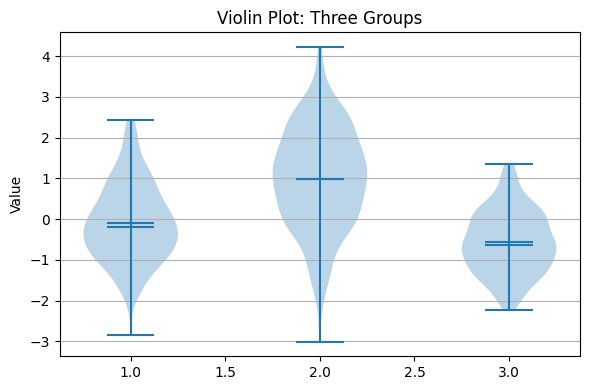

In [10]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A VIOLIN PLOT
# ----------------------------------------------------------------------------------------
# A violin plot is used to visualize the full probability distribution of data.
# It combines the features of a box plot with a kernel density plot, making it ideal
# for understanding data shape, skewness, and multi-modal behaviour.
#
# ADVANTAGES OF VIOLIN PLOTS:
# 1. Shows the entire distribution, not just quartiles.
# 2. Helps visualize density, peaks, and data spread more clearly than box plots.
# 3. Useful for comparing multiple groups side-by-side.
# 4. Ideal in statistical analysis, machine learning EDA, and pattern detection.
# 5. Displays mean and median simultaneously for deeper insights.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                              # Creates a 6x4 inch figure window

plt.violinplot([group1, group2, group3],                                # Draws violin plots for all three groups
                showmeans=True,                                         # Displays the mean inside each violin
                showmedians=True)                                       # Displays the median inside each violin

plt.title('Violin Plot: Three Groups')                                   # Title describing the comparative distribution
plt.ylabel('Value')                                                     # Label for Y-axis

plt.grid(True, axis='y')                                                # Adds horizontal grid lines for readability
plt.tight_layout()                                                      # Ensures spacing is optimized
plt.show()                                                               # Renders the violin plot on screen


## 11) Pie Chart (`plt.pie`) & Donut (via a hole)


**Use-cases:** part-to-whole composition (use sparingly)  
**Key properties:** `labels`, `autopct`, `startangle`, `explode`

**Donut:** add a white circle in the middle to create a donut appearance.


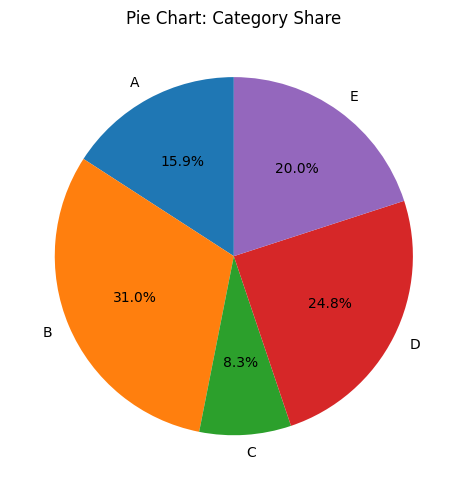

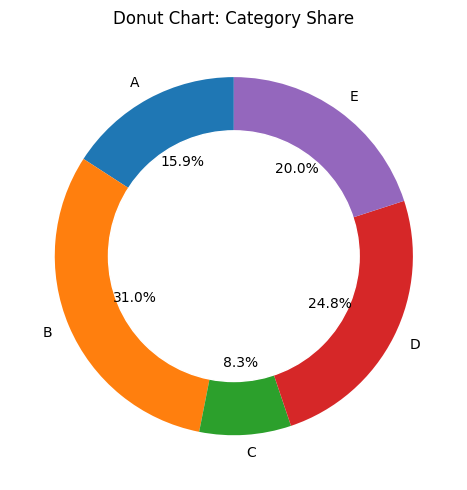

In [11]:
# ----------------------------------------------------------------------------------------
# WHY WE USE PIE & DONUT CHARTS
# ----------------------------------------------------------------------------------------
# Pie and donut charts are used to show the percentage contribution of each category
# to a total. They are effective when you want to highlight proportions, shares,
# and composition of categorical data.
#
# ADVANTAGES OF PIE & DONUT CHARTS:
# 1. Visually intuitive for showing part-to-whole relationships.
# 2. Effective for small datasets (3–7 categories).
# 3. Highlights dominant categories easily.
# 4. Donut charts provide cleaner visualization and allow space for central labeling.
# 5. Widely used in business dashboards and presentations.
# ----------------------------------------------------------------------------------------


# -------------------------------- PIE CHART ---------------------------------------------
plt.figure(figsize=(5,5))                                            # Creates a 5x5 inch figure

plt.pie(values,                                                      # Plots pie chart using category values
        labels=categories,                                           # Labels for each slice
        autopct='%1.1f%%',                                           # Displays percentage with one decimal place
        startangle=90)                                               # Rotates chart to start at 90 degrees for cleaner layout

plt.title('Pie Chart: Category Share')                               # Adds chart title
plt.tight_layout()                                                   # Optimizes spacing
plt.show()                                                           # Displays the pie chart


# -------------------------------- DONUT CHART -------------------------------------------
plt.figure(figsize=(5,5))                                            # Creates new figure for donut chart

wedges, texts, autotexts = plt.pie(values,                           # Creates pie slices
                                   labels=categories,                # Category labels
                                   autopct='%1.1f%%',                # Percentage labels
                                   startangle=90)                    # Rotation for neat layout

circle = plt.Circle((0,0), 0.70, fill=True, color='white')           # Creates a white circle to form donut hole

fig = plt.gcf()                                                      # Gets current figure
fig.gca().add_artist(circle)                                         # Adds circle to chart to convert pie → donut

plt.title('Donut Chart: Category Share')                             # Title for donut chart
plt.tight_layout()                                                   # Ensures no overlap
plt.show()                                                           # Renders donut chart


## 12) Area Chart & Stackplot (`plt.fill_between`, `plt.stackplot`)


**Use-cases:** cumulative totals, composition across ordered x (e.g., time)  
**Key properties:** `alpha`, `labels`

**Note:** For stacked area, ensure all series align on the same x.


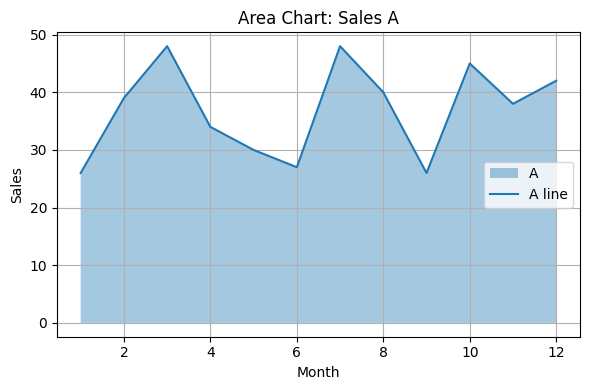

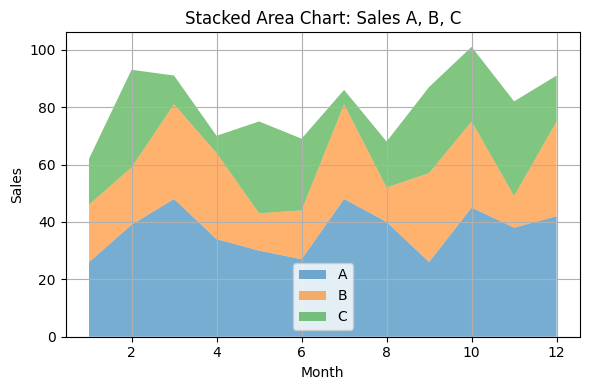

In [12]:
# ----------------------------------------------------------------------------------------
# WHY WE USE AREA & STACKED AREA CHARTS
# ----------------------------------------------------------------------------------------
# Area charts are used to show how a numeric value changes over time while also
# emphasizing the magnitude through the shaded area. Stacked area charts extend this
# concept by showing the cumulative contribution of multiple categories over time.
#
# ADVANTAGES OF AREA & STACKED AREA CHARTS:
# 1. Excellent for time-series analysis (months, years, trends).
# 2. Shows growth or decline patterns clearly.
# 3. Emphasizes magnitude using filled areas.
# 4. Stacked area charts show cumulative contribution of multiple datasets.
# 5. Useful for business dashboards: sales, revenue, production, website traffic.
# ----------------------------------------------------------------------------------------


# -------------------------------------- AREA CHART --------------------------------------
plt.figure(figsize=(6,4))                                              # Creates 6x4 inch figure

plt.fill_between(months, sales_A, alpha=0.4, label='A')                # Fills area under the sales_A curve with transparency
plt.plot(months, sales_A, label='A line')                              # Plots the line on top of filled area for clarity

plt.title('Area Chart: Sales A')                                       # Chart title
plt.xlabel('Month')                                                    # X-axis label
plt.ylabel('Sales')                                                    # Y-axis label

plt.grid(True)                                                         # Adds grid lines for readability
plt.legend()                                                           # Displays label legend
plt.tight_layout()                                                     # Adjusts layout
plt.show()                                                             # Displays the area chart


# ---------------------------------- STACKED AREA CHART -----------------------------------
plt.figure(figsize=(6,4))                                              # New figure for stacked area chart

plt.stackplot(months,                                                  # X-axis values (months)
              sales_A, sales_B, sales_C,                               # Multiple datasets stacked vertically
              labels=['A','B','C'],                                    # Labels for legend
              alpha=0.6)                                               # Transparency for better visibility

plt.title('Stacked Area Chart: Sales A, B, C')                         # Title of stacked chart
plt.xlabel('Month')                                                    # Label for x-axis
plt.ylabel('Sales')                                                    # Label for y-axis

plt.grid(True)                                                         # Adds grid for readability
plt.legend()                                                           # Shows legend for each stack
plt.tight_layout()                                                     # Layout adjustment
plt.show()                                                             # Renders stacked area chart


## 13) Stem Plot (`plt.stem`)


**Use-cases:** discrete sequences, signal processing outputs  
**Key properties:** `linefmt`, `markerfmt`, `basefmt`


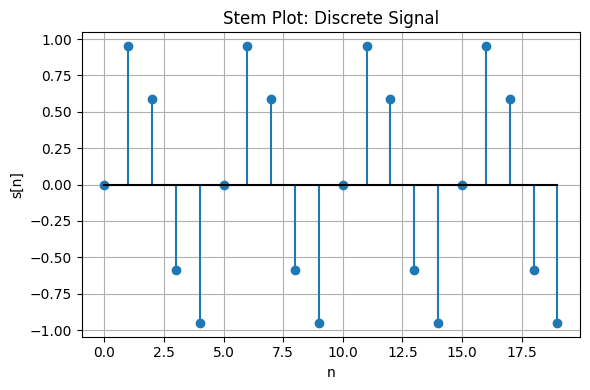

In [13]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A STEM PLOT
# ----------------------------------------------------------------------------------------
# A stem plot is used to visualize discrete-time signals or sequences where data exists
# only at specific intervals. It is commonly used in digital signal processing (DSP),
# communication systems, and sampling-based analysis.
#
# ADVANTAGES OF STEM PLOTS:
# 1. Ideal for representing discrete signals clearly.
# 2. Shows individual sample values without connecting lines.
# 3. Useful for DSP, sampling theory, and digital filters.
# 4. Helps visualize periodicity, amplitude, and sample variation.
# 5. Clean and precise representation for engineering and academic work.
# ----------------------------------------------------------------------------------------


import numpy as np                      # Required for numerical operations
import matplotlib.pyplot as plt         # Required for plotting

n = np.arange(0, 20)                    # Creates discrete sample points from 0 to 19
s = np.sin(0.4 * np.pi * n)             # Computes discrete-time sinusoidal signal at each n

plt.figure(figsize=(6,4))               # Creates figure of size 6x4 inches

plt.stem(n, s,                           # Plots discrete points with stems
         linefmt='-',                    # Style of the stem line (solid line)
         markerfmt='o',                  # Marker style for data points
         basefmt='k')                    # Color/style of the baseline (black)

plt.title('Stem Plot: Discrete Signal')  # Adds title to the plot
plt.xlabel('n')                          # X-axis label (sample index)
plt.ylabel('s[n]')                       # Y-axis label (signal value)

plt.grid(True)                           # Adds grid lines for better readability
plt.tight_layout()                       # Adjusts spacing to avoid label overlap
plt.show()                               # Displays the stem plot


## 14) Step Plot (`plt.step`)


**Use-cases:** piecewise constant signals, cumulative distributions  
**Key properties:** `where` ('pre', 'mid', 'post')


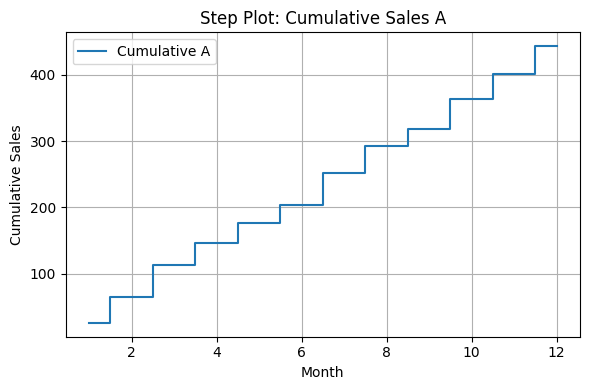

In [14]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A STEP PLOT
# ----------------------------------------------------------------------------------------
# A step plot is used to visualize data that changes at discrete intervals instead of
# changing continuously. It is ideal when values remain constant for a period and then
# jump to the next level.
#
# ADVANTAGES OF STEP PLOTS:
# 1. Best for cumulative or piecewise-constant data.
# 2. Clearly shows changes at specific intervals (month, day, event-driven data).
# 3. Used heavily in inventory management, finance, and digital signal visualization.
# 4. Makes ‘jumps’ or ‘increments’ more visible than line plots.
# 5. Excellent for cumulative sales, stock levels, staircase signals, etc.
# ----------------------------------------------------------------------------------------


plt.figure(figsize=(6,4))                                                      # Creates a 6x4 inch figure

plt.step(months, np.cumsum(sales_A),                                           # Step plot of cumulative monthly sales
         where='mid',                                                          # Step transition occurs midway between points
         label='Cumulative A')                                                 # Label for legend

plt.title('Step Plot: Cumulative Sales A')                                     # Chart title describing purpose
plt.xlabel('Month')                                                             # X-axis label (time in months)
plt.ylabel('Cumulative Sales')                                                  # Y-axis label (running total)

plt.grid(True)                                                                  # Adds grid lines for visual clarity
plt.legend()                                                                    # Displays legend for plotted data

plt.tight_layout()                                                               # Adjusts layout to avoid overlap
plt.show()                                                                       # Renders the step plot


## 15) Error Bar Plot (`plt.errorbar`)


**Use-cases:** show uncertainty or variability around estimates  
**Key properties:** `yerr`, `xerr`, `capsize`, `elinewidth`


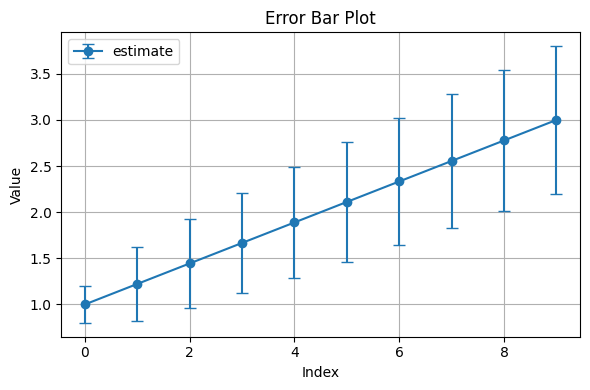

In [15]:
# ----------------------------------------------------------------------------------------
# WHY WE USE AN ERROR BAR PLOT
# ----------------------------------------------------------------------------------------
# An error bar plot shows variability, uncertainty, or measurement error associated with
# each data point. It is commonly used in scientific experiments, statistical modeling,
# machine learning evaluation, and performance comparison.
#
# ADVANTAGES OF ERROR BAR PLOTS:
# 1. Shows uncertainty range for each point (very important in scientific work).
# 2. Highlights variability and measurement error clearly.
# 3. Allows comparison of precision across multiple observations.
# 4. Ideal for lab experiments, sensor readings, model predictions, and surveys.
# 5. Enhances decision-making by visualizing reliability of data.
# ----------------------------------------------------------------------------------------


y_mean = np.linspace(1, 3, 10)                                  # 10 mean values growing linearly from 1 to 3
y_err = 0.2 + 0.2*np.sqrt(np.arange(10))                        # Increasing error values (uncertainty grows with index)
x_pos = np.arange(10)                                           # X positions for each point (0 to 9)

plt.figure(figsize=(6,4))                                       # Creates figure of size 6x4 inches

plt.errorbar(x_pos, y_mean,                                     # Plots mean values at each x position
             yerr=y_err,                                        # Specifies vertical error (uncertainty) for each point
             fmt='o-',                                          # Marker-circle + line style
             capsize=4,                                         # Size of the error bar caps
             label='estimate')                                  # Label for legend

plt.title('Error Bar Plot')                                     # Descriptive chart title
plt.xlabel('Index')                                             # Label for x-axis
plt.ylabel('Value')                                             # Label for y-axis (mean value)

plt.grid(True)                                                  # Enables background grid for readability
plt.legend()                                                    # Displays legend box

plt.tight_layout()                                              # Adjusts plot spacing
plt.show()                                                      # Renders the error bar plot


## 16) Polar Plot (`plt.polar`)


**Use-cases:** cyclical phenomena, angles/radius data  
**Key properties:** standard plot args in polar coordinates


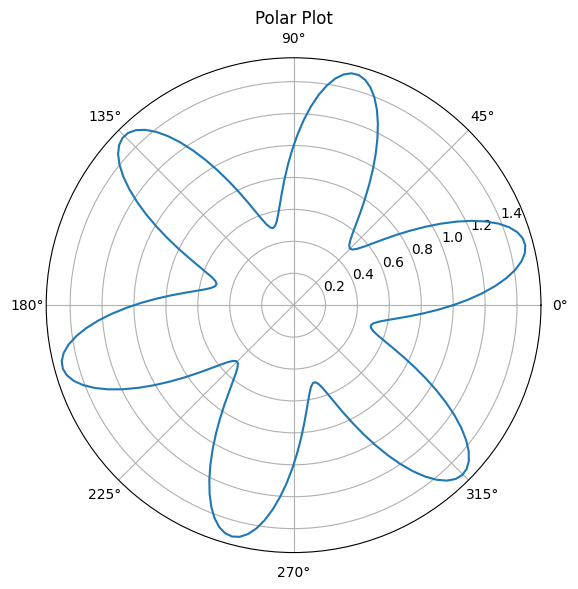

In [16]:
# ----------------------------------------------------------------------------------------
# WHY WE USE A POLAR PLOT
# ----------------------------------------------------------------------------------------
# A polar plot is used to visualize data in terms of angles (θ) and radius (r). It is ideal
# for circular, periodic, or directional datasets such as waves, cycles, signals, and
# patterns involving rotation.
#
# ADVANTAGES OF POLAR PLOTS:
# 1. Best for representing periodic or rotational patterns (e.g., sine waves, radar charts).
# 2. Clearly shows symmetry, cycles, and angular variation.
# 3. Used in engineering, physics, DSP, antenna design, and trigonometric visualization.
# 4. Helps analyze direction-based phenomena (wind direction, signal strength).
# 5. Visually appealing and useful for explaining sinusoidal functions.
# ----------------------------------------------------------------------------------------


theta = np.linspace(0, 2*np.pi, 200)        # Generates 200 angle values from 0 to 2π (full circle)
r = 1 + 0.5*np.sin(6*theta)                 # Computes radius; sinusoidal term creates a 6-petal flower pattern

plt.figure(figsize=(6,6))                   # Creates square figure for balanced polar plotting

plt.polar(theta, r)                         # Plots radius vs angle in a polar coordinate system

plt.title('Polar Plot')                     # Adds a descriptive title to the plot

plt.tight_layout()                          # Adjusts layout to avoid overlap
plt.show()                                   # Displays the polar plot on screen


## 17) 2D Density: Hexbin (`plt.hexbin`) & 2D Histogram (`plt.hist2d`)


**Use-cases:** bivariate density visualization (large scatter)  
**Key properties:** `gridsize` (hexbin), `bins` (hist2d), `extent`


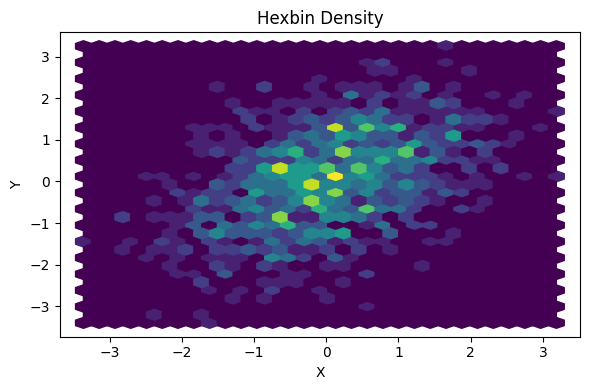

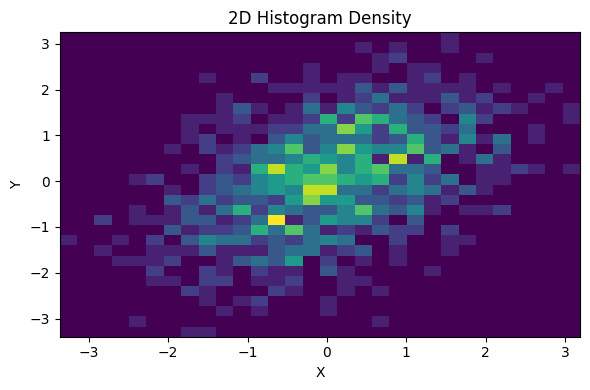

In [17]:
# ----------------------------------------------------------------------------------------
# WHY WE USE 2D DENSITY PLOTS (HEXBIN & 2D HISTOGRAM)
# ----------------------------------------------------------------------------------------
# When we have large sets of (x, y) points, scatter plots can become overcrowded.
# 2D density plots help visualize how many points fall into each region of the plane.
#
# ADVANTAGES OF HEXBIN & 2D HISTOGRAM:
# 1. Shows concentration of data points clearly (clusters, hotspots).
# 2. Handles large datasets better than scatter plots.
# 3. Hexbin provides smoother visuals with hexagonal bins.
# 4. 2D histogram provides grid-based density for precise analysis.
# 5. Useful in machine learning, statistics, finance, and sensor data.
# ----------------------------------------------------------------------------------------


# -------------------------------------- HEXBIN PLOT --------------------------------------
plt.figure(figsize=(6,4))                                       # Create 6x4 inch figure

plt.hexbin(x2, y2d, gridsize=30)                                # Creates hex-based density plot (smooth hexagonal bins)

plt.title('Hexbin Density')                                     # Chart title
plt.xlabel('X')                                                 # Label for x-axis
plt.ylabel('Y')                                                 # Label for y-axis

plt.tight_layout()                                              # Adjusts spacing
plt.show()                                                      # Displays hexbin plot


# ----------------------------------- 2D HISTOGRAM PLOT -----------------------------------
plt.figure(figsize=(6,4))                                       # New figure for 2D histogram

plt.hist2d(x2, y2d, bins=30)                                    # 2D histogram with 30x30 grid bins

plt.title('2D Histogram Density')                               # Chart title
plt.xlabel('X')                                                 # Label for x-axis
plt.ylabel('Y')                                                 # Label for y-axis

plt.tight_layout()                                              # Layout optimization
plt.show()                                                      # Displays 2D histogram


## 18) Contour & Contour-Fill (`plt.contour`, `plt.contourf`)


**Use-cases:** visualize 3D surfaces as iso-value lines/regions in 2D  
**Key properties:** `levels`, `linewidths`


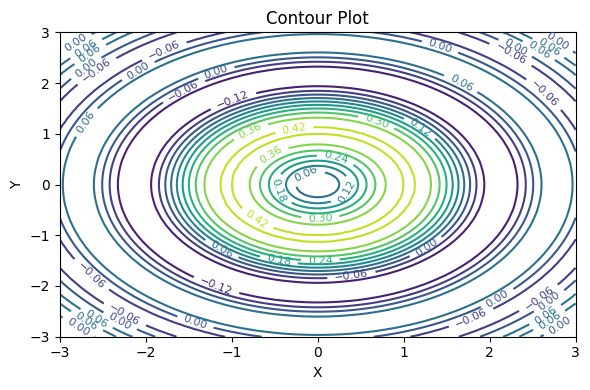

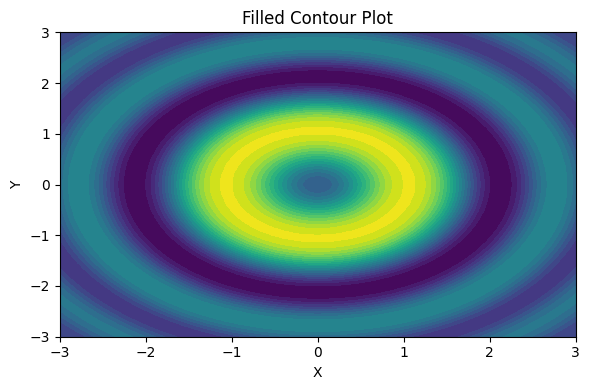

In [18]:

plt.figure(figsize=(6,4))
CS = plt.contour(XX, YY, ZZ, levels=10)
plt.clabel(CS, inline=True, fontsize=8)
plt.title('Contour Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.contourf(XX, YY, ZZ, levels=20)
plt.title('Filled Contour Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


## 19) Image/Heatmap (`plt.imshow`)


**Use-cases:** heatmaps, images, matrix visualization  
**Key properties:** `aspect`, `extent`, `origin`, `interpolation`


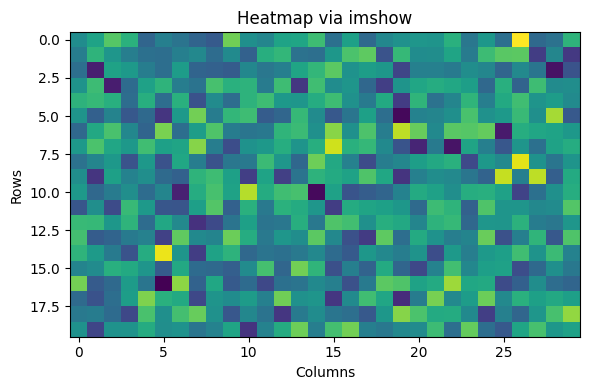

In [19]:

matrix = np.random.randn(20, 30)
plt.figure(figsize=(6,4))
plt.imshow(matrix, aspect='auto', interpolation='nearest')
plt.title('Heatmap via imshow')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()


## 20) Vector Fields: Quiver (`plt.quiver`) & Streamplot (`plt.streamplot`)


**Use-cases:** flows, gradients, vector fields  
**Key properties:** `scale`, `density`


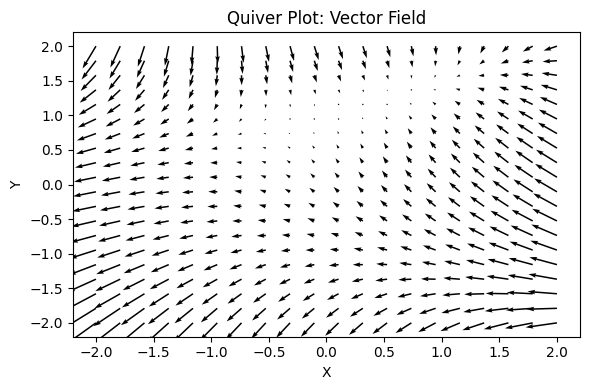

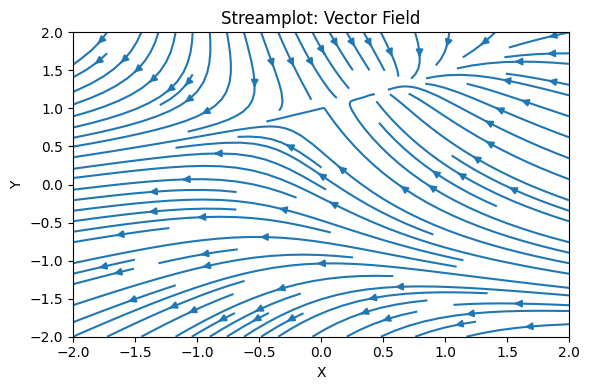

In [20]:

Yq, Xq = np.mgrid[-2:2:20j, -2:2:20j]
U = -1 - Xq**2 + Yq
V = 1 + Xq - Yq**2

plt.figure(figsize=(6,4))
plt.quiver(Xq, Yq, U, V)
plt.title('Quiver Plot: Vector Field')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.streamplot(Xq, Yq, U, V, density=1.0)
plt.title('Streamplot: Vector Field')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()


## 21) 3D Plots (`mpl_toolkits.mplot3d`) — Line, Scatter, Surface, Wireframe, Contour3D


**Use-cases:** visualize data with a third dimension  
**Note:** Uses `projection='3d'`. Each chart is a separate figure.


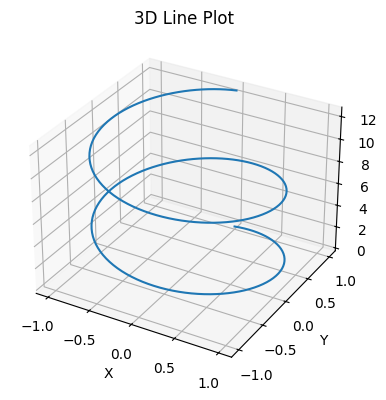

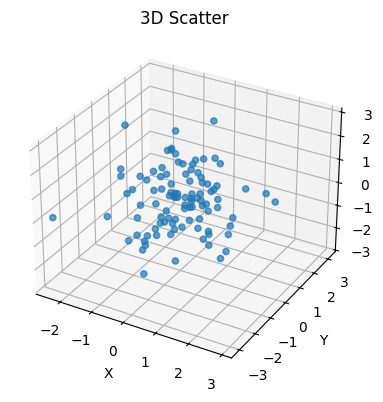

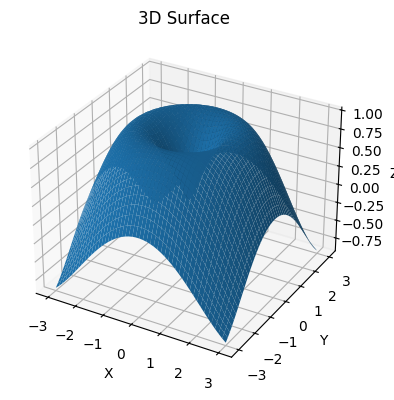

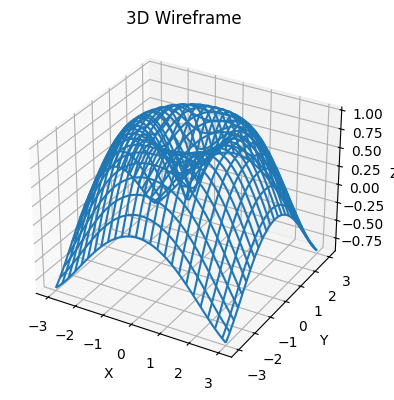

In [21]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Data for 3D
t = np.linspace(0, 4*np.pi, 200)
x3 = np.sin(t); y3 = np.cos(t); z3 = t

# 3D Line
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x3, y3, z3, label='3D line')
ax.set_title('3D Line Plot')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

# 3D Scatter
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.random.randn(100), np.random.randn(100), np.random.randn(100), s=20, alpha=0.7)
ax.set_title('3D Scatter')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

# 3D Surface & Wireframe example grid
Xg = np.linspace(-3, 3, 50)
Yg = np.linspace(-3, 3, 50)
XG, YG = np.meshgrid(Xg, Yg)
ZG = np.sin(np.sqrt(XG**2 + YG**2))

# 3D Surface
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XG, YG, ZG, linewidth=0, antialiased=True)
ax.set_title('3D Surface')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.tight_layout()
plt.show()

# 3D Wireframe
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(XG, YG, ZG, rstride=2, cstride=2)
ax.set_title('3D Wireframe')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
plt.tight_layout()
plt.show()


## 22) Working with Dates (`matplotlib.dates`)


**Use-cases:** time series plotting and formatting  
**Tip:** Use pandas datetime for convenience; format with `AutoDateLocator/Formatter` or pandas helpers.


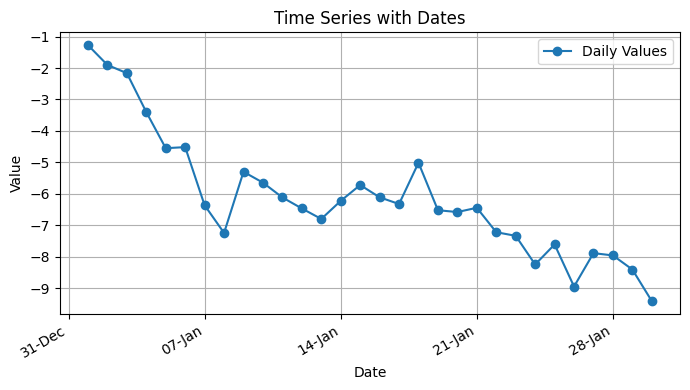

In [22]:

import matplotlib.dates as mdates

dates = pd.date_range('2025-01-01', periods=30, freq='D')
series = np.cumsum(np.random.randn(30))

plt.figure(figsize=(7,4))
plt.plot(dates, series, marker='o', label='Daily Values')
plt.title('Time Series with Dates')
plt.xlabel('Date'); plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Format ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()


## 23) Text, Annotations, and Arrows (`plt.text`, `plt.annotate`)


**Use-cases:** highlight specific points, add explanations  
**Key properties:** `xy`, `xytext`, `arrowprops`


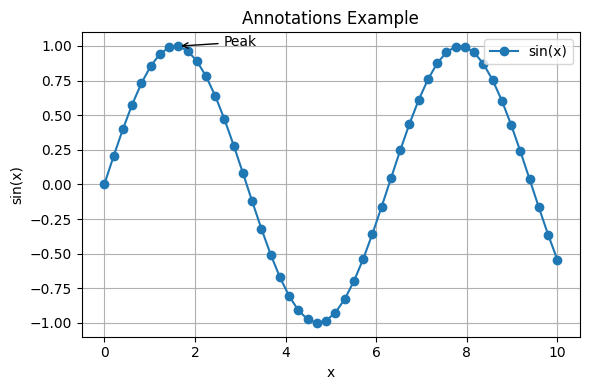

In [23]:

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o', label='sin(x)')
idx_max = np.argmax(y)
plt.annotate('Peak', xy=(x[idx_max], y[idx_max]), xytext=(x[idx_max]+1, y[idx_max]),
             arrowprops=dict(arrowstyle='->'))
plt.title('Annotations Example')
plt.xlabel('x'); plt.ylabel('sin(x)')
plt.grid(True); plt.legend()
plt.tight_layout()
plt.show()


## 24) Ticks, Limits, Spines, and Grids


**Common operations:**
- `plt.xlim()/plt.ylim()` — set ranges  
- Ticks: `plt.xticks([...])`, `plt.yticks([...])`  
- Spines: `ax.spines['top'].set_visible(False)` to hide a spine


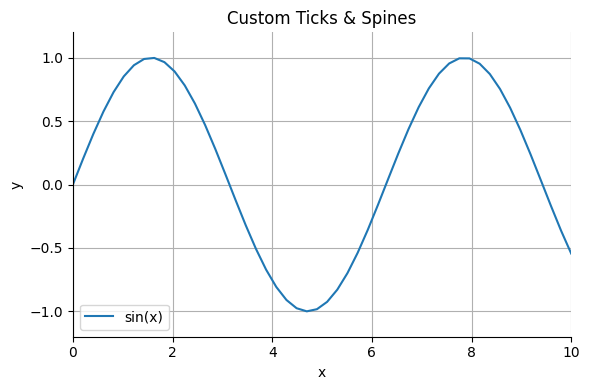

In [24]:

plt.figure(figsize=(6,4))
plt.plot(x, y, label='sin(x)')
plt.title('Custom Ticks & Spines')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True)

ax = plt.gca()
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
plt.tight_layout()
plt.show()


## 25) Legends, Layout, and Exporting Figures


- `plt.legend(loc=...)` — location by string or code  
- `plt.tight_layout()` — reduce overlaps  
- `plt.savefig('figure.png', dpi=300, bbox_inches='tight')` — export


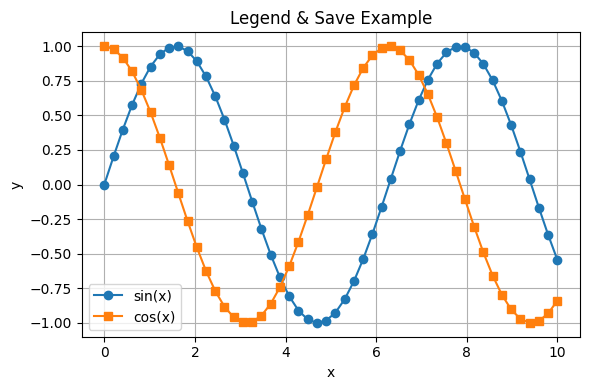

In [25]:

plt.figure(figsize=(6,4))
plt.plot(x, y, marker='o', label='sin(x)')
plt.plot(x, np.cos(x), marker='s', label='cos(x)')
plt.title('Legend & Save Example')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True); plt.legend()

# Save to file (uncomment to write)
# plt.savefig('/mnt/data/legend_example.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


## 26) Final Notes & Best Practices


- Prefer simple, clear visuals with proper labels and units.  
- Use transparency (`alpha`) to reduce overplotting.  
- Avoid pie charts when exact comparisons matter.  
- Keep one message per chart; if you need multi-panel comparisons, create separate figures.  
- Always export at sufficient resolution for print or presentation.
